## task 1

Цель: решить задачу классификации с помощью Keras на своём датасете.

1. Изучите предоставленные материалы. Загрузите и подготовьте данные.
2. Определитесь с архитектурой сети, визуализируйте её. Поэкспериментируйте с сетью: поищите оптимальную архитектуру и  гиперпараметры. Не удаляйте результаты старых экспериментов. Определите качество работы сети. Сравните качество и скорость работы с классическими моделями использованными ранее.
3. Сохраните обученную модель. Добавьте результаты сохранения в папку “keras_models” в корень проекта.

Загрузка данных:

In [ ]:
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

import pandas as pd
import numpy as np

In [ ]:
data_krkopt = pd.read_table('krkopt_preprocessed.csv',sep=',', engine='python')
data_krkopt.columns=['Index', 'W_K_file', 'W_K_rank', 'W_R_file', 'W_R_rank',
                     'B_K_file', 'B_K_rank', 'opt_depth-of-win_for_W']

data_krkopt = data_krkopt.drop(columns=['Index'], axis=1)
data_krkopt.head()

W_K_file  W_K_rank  W_R_file  W_R_rank  B_K_file  B_K_rank  \
0         1         1         3         1         3         2   
1         1         1         3         1         4         1   
2         1         1         3         1         4         2   
3         1         1         3         2         3         1   
4         1         1         3         2         3         3   

   opt_depth-of-win_for_W  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [ ]:
X = data_krkopt.iloc[:, :-1].values
y = data_krkopt.iloc[:, 6].values

In [ ]:
X

array([[1, 1, 3, 1, 3, 2],
       [1, 1, 3, 1, 4, 1],
       [1, 1, 3, 1, 4, 2],
       ...,
       [2, 1, 7, 7, 5, 7],
       [2, 1, 7, 7, 6, 5],
       [2, 1, 7, 7, 7, 5]])

In [ ]:
y

array([0, 0, 0, ..., 4, 4, 4])

# Сравнение качества и скорости работы с классическими моделями использованными ранее.

Разбиение выборки

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

## Метод k-ближайших соседей (K-Nearest Neighbors)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(X_train, y_train)

from sklearn.metrics import classification_report, confusion_matrix

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 510    1    3   16   21]
 [   2  110   17    2    0]
 [   9   20  552   69    0]
 [  37    4   46 1801  106]
 [  46    1    6  131 2101]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88       551
           1       0.81      0.84      0.82       131
           2       0.88      0.85      0.87       650
           3       0.89      0.90      0.90      1994
           4       0.94      0.92      0.93      2285

    accuracy                           0.90      5611
   macro avg       0.87      0.89      0.88      5611
weighted avg       0.91      0.90      0.90      5611



## Классификатор дерева решений (Decision Tree Classifier)

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 503    2    8   25   13]
 [   1  122    6    2    0]
 [   5    9  597   38    1]
 [  39    1   21 1864   69]
 [  26    0    1   64 2194]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89       551
           1       0.91      0.93      0.92       131
           2       0.94      0.92      0.93       650
           3       0.94      0.93      0.94      1994
           4       0.96      0.96      0.96      2285

    accuracy                           0.94      5611
   macro avg       0.93      0.93      0.93      5611
weighted avg       0.94      0.94      0.94      5611



## Наивный байесовский классификатор (Naive Bayes)

In [ ]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0   13   33  203  302]
 [   0   90   26   15    0]
 [   0   60  315  218   57]
 [   0    8  116 1228  642]
 [   0    0    1  354 1930]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       551
           1       0.53      0.69      0.60       131
           2       0.64      0.48      0.55       650
           3       0.61      0.62      0.61      1994
           4       0.66      0.84      0.74      2285

    accuracy                           0.64      5611
   macro avg       0.49      0.53      0.50      5611
weighted avg       0.57      0.64      0.60      5611



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Метод опорных векторов (Support Vector Machines)

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 545    4    0    0    2]
 [   1   82   46    2    0]
 [   5   10  439  192    4]
 [  31    0   62 1621  280]
 [  40    0    1  262 1982]]
              precision    recall  f1-score   support

           0       0.88      0.99      0.93       551
           1       0.85      0.63      0.72       131
           2       0.80      0.68      0.73       650
           3       0.78      0.81      0.80      1994
           4       0.87      0.87      0.87      2285

    accuracy                           0.83      5611
   macro avg       0.84      0.79      0.81      5611
weighted avg       0.83      0.83      0.83      5611



## Логистическая регрессия (Logistic Regression)

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    8   40  242  261]
 [   0   64   53   13    1]
 [   0   41  353  162   94]
 [   0    2  121 1222  649]
 [   0    0    5  627 1653]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       551
           1       0.56      0.49      0.52       131
           2       0.62      0.54      0.58       650
           3       0.54      0.61      0.57      1994
           4       0.62      0.72      0.67      2285

    accuracy                           0.59      5611
   macro avg       0.47      0.47      0.47      5611
weighted avg       0.53      0.59      0.56      5611



/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0

# Keras

In [ ]:
################################################################################################################################################
data_krkopt = data_krkopt.loc[~data_krkopt['opt_depth-of-win_for_W'].isin([1,2,3])]
data_krkopt['opt_depth-of-win_for_W'] = np.where((data_krkopt['opt_depth-of-win_for_W'] == 4), 1, data_krkopt['opt_depth-of-win_for_W'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
data_krkopt.head()

W_K_file  W_K_rank  W_R_file  W_R_rank  B_K_file  B_K_rank  \
0         1         1         3         1         3         2   
1         1         1         3         1         4         1   
2         1         1         3         1         4         2   
3         1         1         3         2         3         1   
4         1         1         3         2         3         3   

   opt_depth-of-win_for_W  
0                       0  
1                       0  
2                       0  
3                       0  
4                       0

In [ ]:
X = data_krkopt.iloc[:, :-1].values
y = data_krkopt.iloc[:, 6].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

### 1:

In [ ]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(1, activation='relu'))

In [ ]:
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 6)                 42        
                                                                 
 dense_7 (Dense)             (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
None


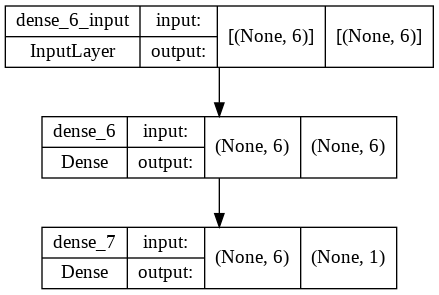

In [ ]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
1128/1128 [==============================] - 4s 3ms/step - loss: 3.0477 - accuracy: 0.8001
Epoch 2/150
1128/1128 [==============================] - 2s 2ms/step - loss: 3.0477 - accuracy: 0.8001
Epoch 3/150
1128/1128 [==============================] - 2s 2ms/step - loss: 3.0477 - accuracy: 0.8001
Epoch 4/150
1128/1128 [==============================] - 2s 2ms/step - loss: 3.0477 - accuracy: 0.8001
Epoch 5/150
1128/1128 [==============================] - 2s 2ms/step - loss: 3.0477 - accuracy: 0.8001
Epoch 6/150
1128/1128 [==============================] - 2s 2ms/step - loss: 3.0477 - accuracy: 0.8001
Epoch 7/150
1128/1128 [==============================] - 2s 2ms/step - loss: 3.0477 - accuracy: 0.8001
Epoch 8/150
1128/1128 [==============================] - 2s 2ms/step - loss: 3.0477 - accuracy: 0.8001
Epoch 9/150
1128/1128 [==============================] - 2s 2ms/step - loss: 3.0477 - accuracy: 0.8001
Epoch 10/150
1128/1128 [==============================] - 2s 2ms/step - l

In [ ]:
something, accuracy = model.evaluate(X, y)
print(accuracy)

441/441 [==============================] - 1s 2ms/step - loss: 3.0232 - accuracy: 0.8017
0.8017449378967285


In [ ]:
predictions = (model.predict(X) > 0.5).astype("int32")
for i in range(10):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[1, 1, 3, 1, 3, 2] => 1 (expected 0)
[1, 1, 3, 1, 4, 1] => 1 (expected 0)
[1, 1, 3, 1, 4, 2] => 1 (expected 0)
[1, 1, 3, 2, 3, 1] => 1 (expected 0)
[1, 1, 3, 2, 3, 3] => 1 (expected 0)
[1, 1, 3, 2, 4, 1] => 1 (expected 0)
[1, 1, 3, 2, 4, 2] => 1 (expected 0)
[1, 1, 3, 2, 4, 3] => 1 (expected 0)
[1, 1, 3, 3, 3, 2] => 1 (expected 0)
[1, 1, 3, 3, 4, 2] => 1 (expected 0)


--------------------------------------------------------------------------------------------------------------------------------------------------------------

### 2:

In [ ]:
model = Sequential()
model.add(Dense(6, input_dim=6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 6)                 42        
                                                                 
 dense_19 (Dense)            (None, 1)                 7         
                                                                 
Total params: 49
Trainable params: 49
Non-trainable params: 0
_________________________________________________________________
None


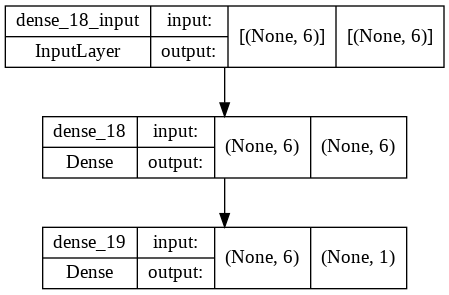

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
# fit the keras model on the dataset
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=150, batch_size=10)

Epoch 1/150
1128/1128 [==============================] - 4s 3ms/step - loss: 0.6091 - accuracy: 0.7574
Epoch 2/150
1128/1128 [==============================] - 2s 2ms/step - loss: 0.4491 - accuracy: 0.8018
Epoch 3/150
1128/1128 [==============================] - 2s 2ms/step - loss: 0.4044 - accuracy: 0.8176
Epoch 4/150
1128/1128 [==============================] - 2s 2ms/step - loss: 0.3660 - accuracy: 0.8298
Epoch 5/150
1128/1128 [==============================] - 2s 2ms/step - loss: 0.3241 - accuracy: 0.8468
Epoch 6/150
1128/1128 [==============================] - 2s 2ms/step - loss: 0.2797 - accuracy: 0.8749
Epoch 7/150
1128/1128 [==============================] - 2s 2ms/step - loss: 0.2419 - accuracy: 0.8948
Epoch 8/150
1128/1128 [==============================] - 2s 2ms/step - loss: 0.2115 - accuracy: 0.9133
Epoch 9/150
1128/1128 [==============================] - 2s 2ms/step - loss: 0.1858 - accuracy: 0.9286
Epoch 10/150
1128/1128 [==============================] - 2s 2ms/step - l

In [ ]:
something, accuracy = model.evaluate(X, y)
print(accuracy)

441/441 [==============================] - 1s 2ms/step - loss: 0.0244 - accuracy: 0.9959
0.995885968208313


In [ ]:
predictions = (model.predict(X) > 0.5).astype("int32")
for i in range(10):
	print('%s => %d (expected %d)' % (X[i].tolist(), predictions[i], y[i]))

[1, 1, 3, 1, 3, 2] => 0 (expected 0)
[1, 1, 3, 1, 4, 1] => 0 (expected 0)
[1, 1, 3, 1, 4, 2] => 0 (expected 0)
[1, 1, 3, 2, 3, 1] => 0 (expected 0)
[1, 1, 3, 2, 3, 3] => 0 (expected 0)
[1, 1, 3, 2, 4, 1] => 0 (expected 0)
[1, 1, 3, 2, 4, 2] => 0 (expected 0)
[1, 1, 3, 2, 4, 3] => 0 (expected 0)
[1, 1, 3, 3, 3, 2] => 0 (expected 0)
[1, 1, 3, 3, 4, 2] => 0 (expected 0)


In [ ]:
model.save("myModel")

INFO:tensorflow:Assets written to: myModel/assets
